In [12]:
import sys
import asyncio
import logging
import numpy as np
import matplotlib.pyplot as plt
from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [2]:
script = LatissCWFSAlign(index=1)

In [3]:
await asyncio.gather(script.start_task, script.attcs.start_task, script.latiss.start_task)

RemoteTelemetry(ATDome, 0, position) falling behind; read 25 messages


[None, [None, None, None, None, None, None, None], [None, None, None, None]]

In [4]:
script.angle = 0.

In [5]:
script.intra_visit_id = 2020012800333
script.extra_visit_id = 2020012800334

In [6]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [7]:
await script.run_cwfs()

Running cwfs in 2020012800333/2020012800334.


/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/pex_config/19.0.0+2/python/lsst/pex/config/config.py:1289: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  FutureWarning)


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200128_000333.yaml
AT_O_20200128_000333: Forcing detector serial to ITL-3800C-068
AT_O_20200128_000333: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200128_000333.yaml
AT_O_20200128_000333: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200128_000333: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200128_000333.yaml
AT_O_20200128_000333: Forcing detector serial to ITL-3800C-068
AT_O_20200128_000333: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200128_000333.yaml
AT_O_20200128_000333: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200128_000333:

/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/meas_algorithms/19.0.0-2-g3d9e4fb2+9/python/lsst/meas/algorithms/subtractBackground.py:325: FutureWarning: Call to deprecated method __init__. (Overloads that take a ``style`` parameter are deprecated; the style must be passed to `Background.getImageF` instead. To be removed after 20.0.0.)
  self.config.statisticsProperty)
/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/meas_algorithms/19.0.0-2-g3d9e4fb2+9/python/lsst/meas/algorithms/detection.py:440: FutureWarning: Call to deprecated method getImageF(). (Zero-argument overload is deprecated; use one that takes an ``interpStyle`` instead. To be removed after 20.0.0.)
  bgImage = bg.getImageF()


RemoteTelemetry(ATDome, 0, position) falling behind; read 49 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 50 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 10 messages


/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/meas_algorithms/19.0.0-2-g3d9e4fb2+9/python/lsst/meas/algorithms/detection.py:701: FutureWarning: Call to deprecated method getImageF(). (Zero-argument overload is deprecated; use one that takes an ``interpStyle`` instead. To be removed after 20.0.0.)
  maskedImage -= bg.getImageF()
/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/meas_algorithms/19.0.0-2-g3d9e4fb2+9/python/lsst/meas/algorithms/detection.py:702: FutureWarning: Passing Background objects to BackgroundList is deprecated; use a (Background, Interpolation.Style, UndersampleStyle, ApproximateControl.Style, int, int, bool) tuple instead.
  backgrounds.append(bg)


RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 10 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 10 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 10 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 10 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 51 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_

In [8]:
script.show_results()

        Measured zernike coeficients: [-27.375701671415015, 66.47224962886402, -13.709172252842295]
        De-rotated zernike coeficients: [ -2.9898965   71.82652387 -13.70917225]
        Hexapod offset: [0.02282364 0.54829408 0.00326409]
        Telescope offsets: [ 1.36941825 32.89764452  0.        ]
        


In [9]:
print(script.algo.zer4UpNm[:9])

[-13.70917225 -42.43114754  76.97677377 -27.37570167  66.47224963
  11.70080796 -47.06979658  24.81044209  -5.7361078 ]


update_title_pos
update_title_pos
update_title_pos
update_title_pos


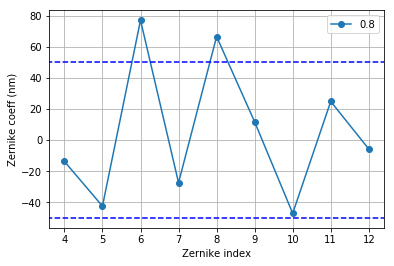

In [13]:
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')

xlim = plt.xlim()

plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


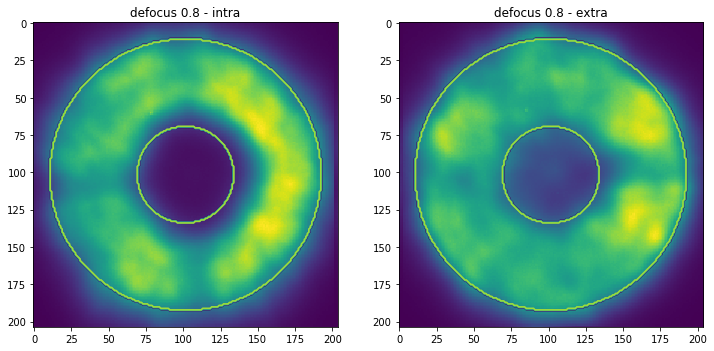

In [10]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 